In [5]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
train_data_dir = '../data/localdata/chest_xray/train'
test_data_dir = '../data/localdata/chest_xray/test'

generator =ImageDataGenerator(rescale=1/255, validation_split=.25)

train_generator= generator.flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', subset='training', class_mode='binary')
validation_set=generator.flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', subset='validation', class_mode='binary')
test_generator = generator.flow_from_directory(
        test_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', class_mode='binary', shuffle=False)

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(validation_set)

Found 6280 images belonging to 2 classes.
Found 2092 images belonging to 2 classes.
Found 1140 images belonging to 2 classes.


In [3]:
train_images.shape

(32, 64, 64, 1)

In [8]:
def plot_loss_recall_and_accuracy(results, final=False):
    
    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_recall = results.history['recall']
    val_recall = results.history['val_recall']
    train_accuracy = results.history['binary_accuracy']
    val_accuracy = results.history['val_binary_accuracy']

    # Setting up plots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    #Plotting precision
    ax2.set_title("Recall")
    sns.lineplot(x=results.epoch, y=train_recall, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_recall, ax=ax2, label=val_label)
    ax2.legend()
    
    # Plotting accuracy info
    ax3.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax3, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax3, label=val_label)
    ax3.legend()

#this function was adapted from Flatiron instructional materials

Epoch 1/10
197/197 [==============================] - 90s 455ms/step - loss: 0.3245 - recall: 0.9930 - binary_accuracy: 0.8632 - val_loss: 0.2394 - val_recall: 0.9989 - val_binary_accuracy: 0.8791
Epoch 2/10
197/197 [==============================] - 90s 456ms/step - loss: 0.2204 - recall: 0.9928 - binary_accuracy: 0.9232 - val_loss: 0.1736 - val_recall: 0.9949 - val_binary_accuracy: 0.9350
Epoch 3/10
197/197 [==============================] - 89s 454ms/step - loss: 0.1917 - recall: 0.9873 - binary_accuracy: 0.9330 - val_loss: 0.2159 - val_recall: 0.9989 - val_binary_accuracy: 0.9039
Epoch 4/10
197/197 [==============================] - 93s 473ms/step - loss: 0.1681 - recall: 0.9894 - binary_accuracy: 0.9500 - val_loss: 0.1537 - val_recall: 0.9937 - val_binary_accuracy: 0.9402
Epoch 5/10
197/197 [==============================] - 98s 496ms/step - loss: 0.1602 - recall: 0.9852 - binary_accuracy: 0.9498 - val_loss: 0.1351 - val_recall: 0.9937 - val_binary_accuracy: 0.9622
Epoch 6/10
197/

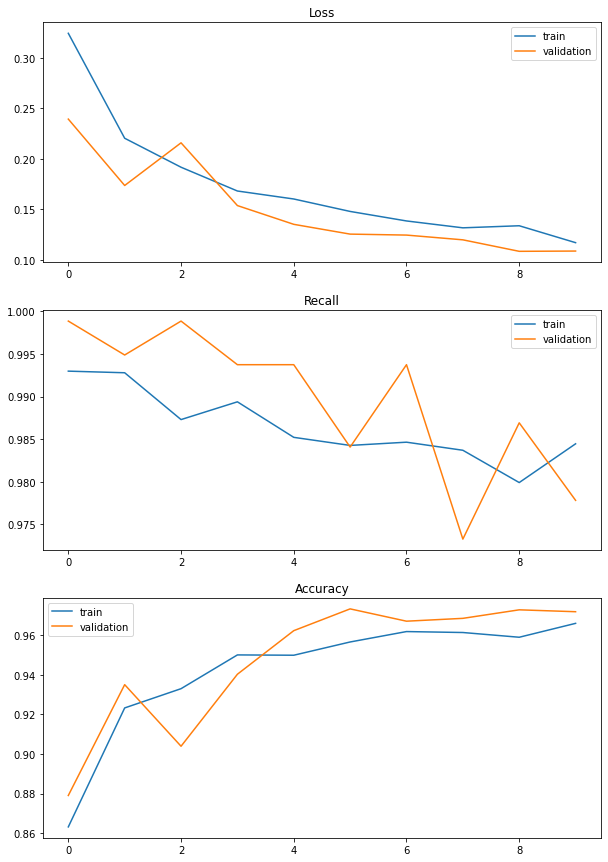

In [5]:
simple_model = models.Sequential()
simple_model.add(layers.Flatten())
simple_model.add(Dense(12, activation='relu'))
simple_model.add(Dense(1, activation='sigmoid'))

simple_model.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Recall', 'BinaryAccuracy'])
                 
results = simple_model.fit(train_generator, epochs=10, validation_data=validation_set)
plot_loss_recall_and_accuracy(results)



Epoch 1/10
197/197 [==============================] - 107s 541ms/step - loss: 0.2085 - recall: 0.9746 - binary_accuracy: 0.9196 - val_loss: 0.0879 - val_recall: 0.9932 - val_binary_accuracy: 0.9651
Epoch 2/10
197/197 [==============================] - 105s 531ms/step - loss: 0.0811 - recall: 0.9879 - binary_accuracy: 0.9705 - val_loss: 0.0939 - val_recall: 0.9977 - val_binary_accuracy: 0.9608
Epoch 3/10
197/197 [==============================] - 105s 531ms/step - loss: 0.0639 - recall: 0.9882 - binary_accuracy: 0.9764 - val_loss: 0.0564 - val_recall: 0.9926 - val_binary_accuracy: 0.9818
Epoch 4/10
197/197 [==============================] - 99s 503ms/step - loss: 0.0529 - recall: 0.9911 - binary_accuracy: 0.9811 - val_loss: 0.0584 - val_recall: 0.9937 - val_binary_accuracy: 0.9809
Epoch 5/10
197/197 [==============================] - 68s 347ms/step - loss: 0.0393 - recall: 0.9943 - binary_accuracy: 0.9873 - val_loss: 0.0601 - val_recall: 0.9818 - val_binary_accuracy: 0.9785
Epoch 6/10
1

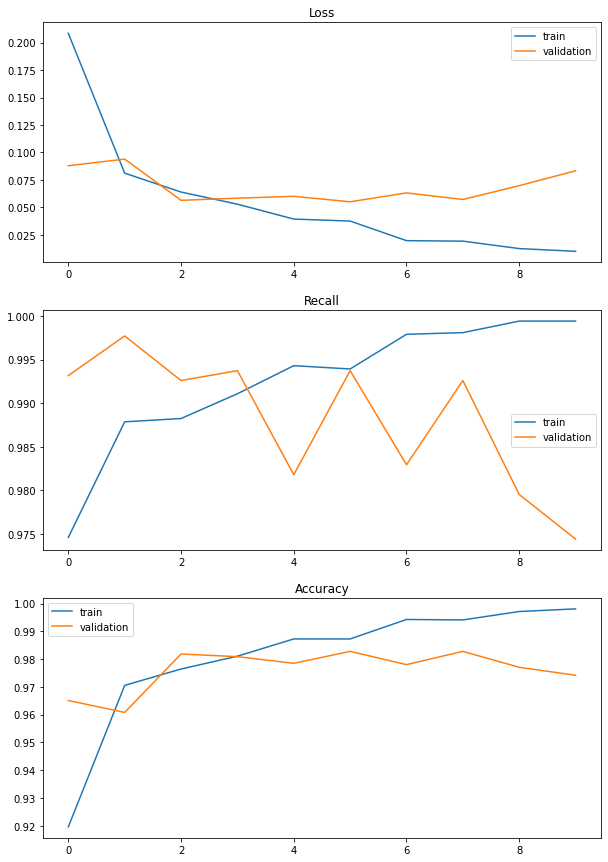

In [6]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
               metrics=['Recall', 'BinaryAccuracy'])

results2 = model2.fit(train_generator, epochs=10, validation_data=validation_set)
plot_loss_recall_and_accuracy(results2)


Epoch 1/10
197/197 [==============================] - 109s 552ms/step - loss: 0.2706 - recall: 0.9936 - binary_accuracy: 0.8825 - val_loss: 0.1549 - val_recall: 0.9943 - val_binary_accuracy: 0.9704
Epoch 2/10
197/197 [==============================] - 107s 542ms/step - loss: 0.1554 - recall: 0.9941 - binary_accuracy: 0.9588 - val_loss: 0.1438 - val_recall: 0.9966 - val_binary_accuracy: 0.9579
Epoch 3/10
197/197 [==============================] - 108s 548ms/step - loss: 0.1360 - recall: 0.9934 - binary_accuracy: 0.9683 - val_loss: 0.1236 - val_recall: 0.9909 - val_binary_accuracy: 0.9732
Epoch 4/10
197/197 [==============================] - 108s 548ms/step - loss: 0.1177 - recall: 0.9943 - binary_accuracy: 0.9771 - val_loss: 0.1186 - val_recall: 0.9932 - val_binary_accuracy: 0.9732
Epoch 5/10
197/197 [==============================] - 107s 545ms/step - loss: 0.1030 - recall: 0.9941 - binary_accuracy: 0.9825 - val_loss: 0.1096 - val_recall: 0.9932 - val_binary_accuracy: 0.9747
Epoch 6/10

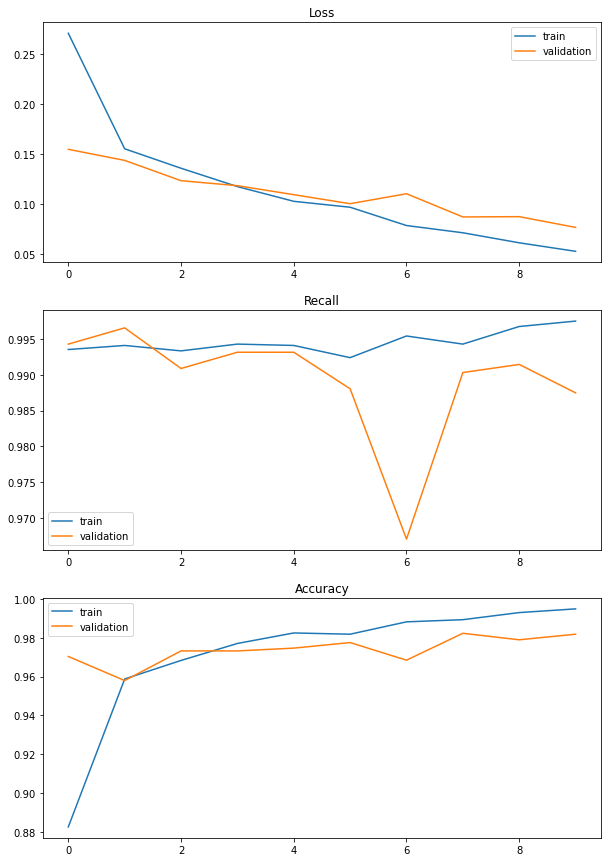

In [7]:
model3 = models.Sequential()
model3.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
                metrics=['Recall', 'BinaryAccuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           verbose=1, patience=3,
                           mode='min')

results3 = model3.fit(train_generator, epochs=10, validation_data=validation_set,
                    callbacks=[early_stop])
plot_loss_recall_and_accuracy(results3)


Epoch 1/10
197/197 [==============================] - 90s 457ms/step - loss: 0.2316 - recall: 0.9763 - binary_accuracy: 0.9119 - val_loss: 0.1041 - val_recall: 0.9784 - val_binary_accuracy: 0.9570
Epoch 2/10
197/197 [==============================] - 86s 437ms/step - loss: 0.0989 - recall: 0.9809 - binary_accuracy: 0.9613 - val_loss: 0.0750 - val_recall: 0.9852 - val_binary_accuracy: 0.9713
Epoch 3/10
197/197 [==============================] - 84s 427ms/step - loss: 0.0710 - recall: 0.9864 - binary_accuracy: 0.9731 - val_loss: 0.0848 - val_recall: 0.9966 - val_binary_accuracy: 0.9661
Epoch 4/10
197/197 [==============================] - 114s 576ms/step - loss: 0.0532 - recall: 0.9898 - binary_accuracy: 0.9803 - val_loss: 0.0631 - val_recall: 0.9824 - val_binary_accuracy: 0.9771
Epoch 5/10
197/197 [==============================] - 115s 584ms/step - loss: 0.0490 - recall: 0.9900 - binary_accuracy: 0.9804 - val_loss: 0.1165 - val_recall: 0.9613 - val_binary_accuracy: 0.9613
Epoch 6/10
19

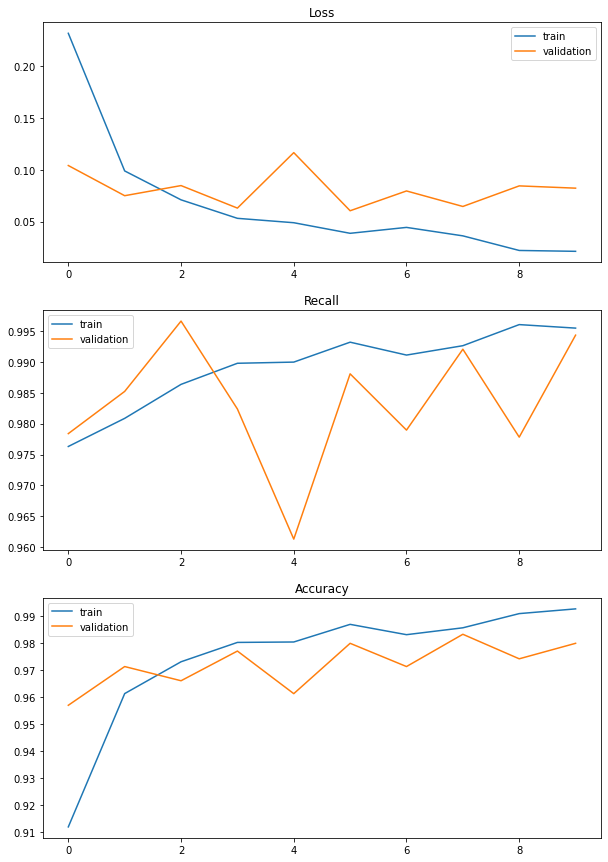

In [8]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
                metrics=['Recall', 'BinaryAccuracy'])
results4 = model4.fit(train_generator, epochs=10, validation_data=validation_set)
plot_loss_recall_and_accuracy(results4)



Epoch 1/10
197/197 [==============================] - 93s 472ms/step - loss: 1183.5894 - recall: 0.8813 - binary_accuracy: 0.7616 - val_loss: 0.5765 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 2/10
197/197 [==============================] - 90s 457ms/step - loss: 0.5381 - recall: 0.9503 - binary_accuracy: 0.8075 - val_loss: 0.8091 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 3/10
197/197 [==============================] - 86s 435ms/step - loss: 0.5586 - recall: 0.9640 - binary_accuracy: 0.8151 - val_loss: 0.5447 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 4/10
197/197 [==============================] - 98s 495ms/step - loss: 0.5267 - recall: 0.9750 - binary_accuracy: 0.8234 - val_loss: 0.4629 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 5/10
197/197 [==============================] - 107s 542ms/step - loss: 0.5390 - recall: 0.9596 - binary_accuracy: 0.8129 - val_loss: 0.5715 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 6/10


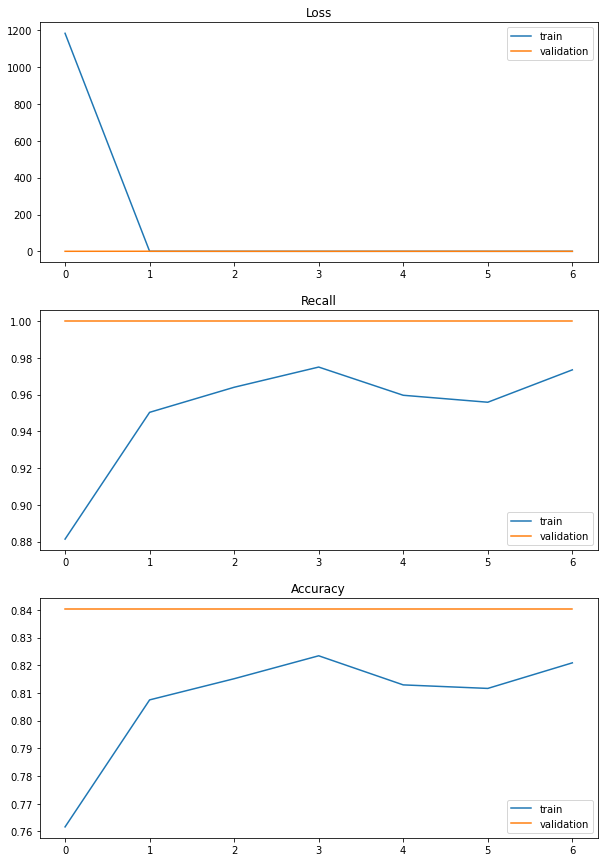

In [9]:
#adjusted learning rate
model5 = models.Sequential()
model5.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model5.add(layers.MaxPooling2D(pool_size=(2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1),
              loss='BinaryCrossentropy',
                metrics=['Recall', 'BinaryAccuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           verbose=1, patience=3,
                           mode='min')

results5 = model5.fit(train_generator, epochs=10, validation_data=validation_set,
                    callbacks=[early_stop])
plot_loss_recall_and_accuracy(results5)


Epoch 1/10
197/197 [==============================] - 107s 542ms/step - loss: 1.1710 - recall: 0.9898 - binary_accuracy: 0.8330 - val_loss: 0.4398 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 2/10
197/197 [==============================] - 107s 545ms/step - loss: 0.4428 - recall: 1.0000 - binary_accuracy: 0.8400 - val_loss: 0.4395 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 3/10
197/197 [==============================] - 106s 539ms/step - loss: 0.4418 - recall: 1.0000 - binary_accuracy: 0.8400 - val_loss: 0.4406 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 4/10
197/197 [==============================] - 106s 538ms/step - loss: 0.4416 - recall: 1.0000 - binary_accuracy: 0.8400 - val_loss: 0.4391 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 5/10
197/197 [==============================] - 107s 541ms/step - loss: 0.4409 - recall: 1.0000 - binary_accuracy: 0.8400 - val_loss: 0.4397 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 6/10

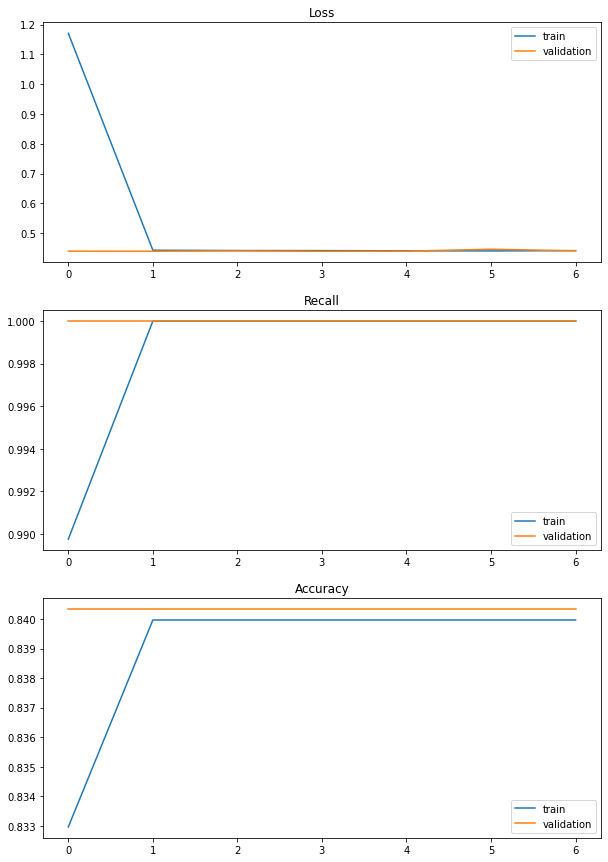

In [10]:
# another learning rate adjustment, still too high
model6 = models.Sequential()
model6.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model6.add(layers.MaxPooling2D(pool_size=(2, 2)))
model6.add(layers.Flatten())
model6.add(layers.Dense(64, activation='relu'))
model6.add(layers.Dense(1, activation='sigmoid'))

model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.1),
              loss='BinaryCrossentropy',
              metrics=['Recall', 'BinaryAccuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           verbose=1, patience=3,
                           mode='min')

results6 = model6.fit(train_generator, epochs=10, validation_data=validation_set,
                    callbacks=[early_stop])
plot_loss_recall_and_accuracy(results6)


Epoch 1/10
197/197 [==============================] - 108s 547ms/step - loss: 0.4773 - recall: 0.9702 - binary_accuracy: 0.8960 - val_loss: 0.1390 - val_recall: 0.9551 - val_binary_accuracy: 0.9575
Epoch 2/10
197/197 [==============================] - 107s 543ms/step - loss: 0.0906 - recall: 0.9843 - binary_accuracy: 0.9653 - val_loss: 0.1130 - val_recall: 0.9954 - val_binary_accuracy: 0.9570
Epoch 3/10
197/197 [==============================] - 107s 541ms/step - loss: 0.1133 - recall: 0.9820 - binary_accuracy: 0.9581 - val_loss: 0.0836 - val_recall: 0.9903 - val_binary_accuracy: 0.9689
Epoch 4/10
197/197 [==============================] - 100s 509ms/step - loss: 0.0701 - recall: 0.9881 - binary_accuracy: 0.9742 - val_loss: 0.0917 - val_recall: 0.9693 - val_binary_accuracy: 0.9651
Epoch 5/10
197/197 [==============================] - 91s 464ms/step - loss: 0.0538 - recall: 0.9915 - binary_accuracy: 0.9815 - val_loss: 0.1328 - val_recall: 0.9585 - val_binary_accuracy: 0.9584
Epoch 6/10


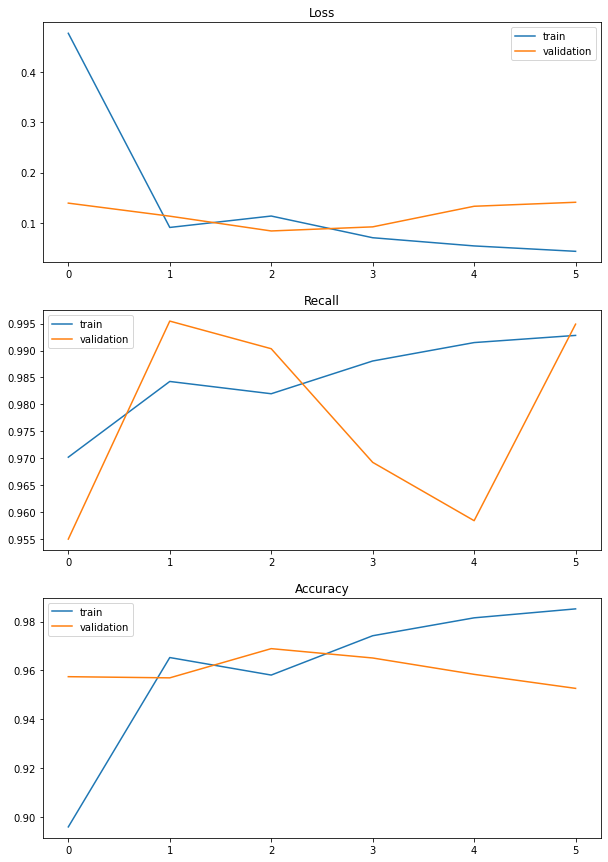

In [11]:
#brought it down again, but still higher than original
model7 = models.Sequential()
model7.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model7.add(layers.MaxPooling2D(pool_size=(2, 2)))
model7.add(layers.Flatten())
model7.add(layers.Dense(64, activation='relu'))
model7.add(layers.Dense(1, activation='sigmoid'))

model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
              loss='BinaryCrossentropy',
              metrics=['Recall', 'BinaryAccuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           verbose=1, patience=3,
                           mode='min')

results7 = model7.fit(train_generator, epochs=10, validation_data=validation_set,
                    callbacks=[early_stop])
plot_loss_recall_and_accuracy(results7)

Epoch 1/10
197/197 [==============================] - 89s 452ms/step - loss: 0.3388 - recall: 0.9973 - binary_accuracy: 0.8382 - val_loss: 0.2520 - val_recall: 1.0000 - val_binary_accuracy: 0.8403
Epoch 2/10
197/197 [==============================] - 90s 455ms/step - loss: 0.2166 - recall: 0.9973 - binary_accuracy: 0.9086 - val_loss: 0.1797 - val_recall: 0.9954 - val_binary_accuracy: 0.9316
Epoch 3/10
197/197 [==============================] - 88s 445ms/step - loss: 0.1840 - recall: 0.9966 - binary_accuracy: 0.9371 - val_loss: 0.1649 - val_recall: 0.9977 - val_binary_accuracy: 0.9407
Epoch 4/10
197/197 [==============================] - 88s 445ms/step - loss: 0.1693 - recall: 0.9958 - binary_accuracy: 0.9519 - val_loss: 0.1535 - val_recall: 0.9954 - val_binary_accuracy: 0.9594
Epoch 5/10
197/197 [==============================] - 88s 445ms/step - loss: 0.1586 - recall: 0.9962 - binary_accuracy: 0.9596 - val_loss: 0.1484 - val_recall: 0.9932 - val_binary_accuracy: 0.9685
Epoch 6/10
197/

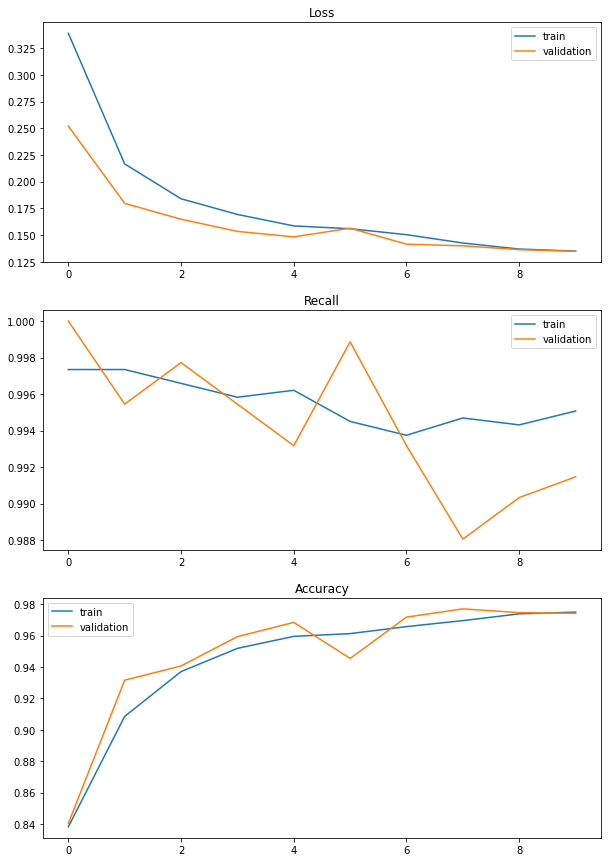

In [12]:
#trying a smaller than normal learning rate too
model8 = models.Sequential()
model8.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model8.add(layers.MaxPooling2D(pool_size=(2, 2)))
model8.add(layers.Flatten())
model8.add(layers.Dense(64, activation='relu'))
model8.add(layers.Dense(1, activation='sigmoid'))

model8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
              loss='BinaryCrossentropy',
              metrics=['Recall', 'BinaryAccuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           verbose=1, patience=3,
                           mode='min')

results8 = model8.fit(train_generator, epochs=10, validation_data=validation_set,
                    callbacks=[early_stop])
plot_loss_recall_and_accuracy(results8)


Epoch 1/10
197/197 [==============================] - 106s 539ms/step - loss: 0.2792 - recall: 0.9915 - binary_accuracy: 0.8787 - val_loss: 0.2117 - val_recall: 0.9989 - val_binary_accuracy: 0.8920
Epoch 2/10
197/197 [==============================] - 98s 497ms/step - loss: 0.1674 - recall: 0.9937 - binary_accuracy: 0.9475 - val_loss: 0.1427 - val_recall: 0.9966 - val_binary_accuracy: 0.9498
Epoch 3/10
197/197 [==============================] - 88s 445ms/step - loss: 0.1400 - recall: 0.9930 - binary_accuracy: 0.9672 - val_loss: 0.1539 - val_recall: 0.9613 - val_binary_accuracy: 0.9627
Epoch 4/10
197/197 [==============================] - 86s 439ms/step - loss: 0.1278 - recall: 0.9905 - binary_accuracy: 0.9715 - val_loss: 0.1335 - val_recall: 0.9966 - val_binary_accuracy: 0.9651
Epoch 5/10
197/197 [==============================] - 86s 435ms/step - loss: 0.1136 - recall: 0.9905 - binary_accuracy: 0.9753 - val_loss: 0.1170 - val_recall: 0.9943 - val_binary_accuracy: 0.9708
Epoch 6/10
197

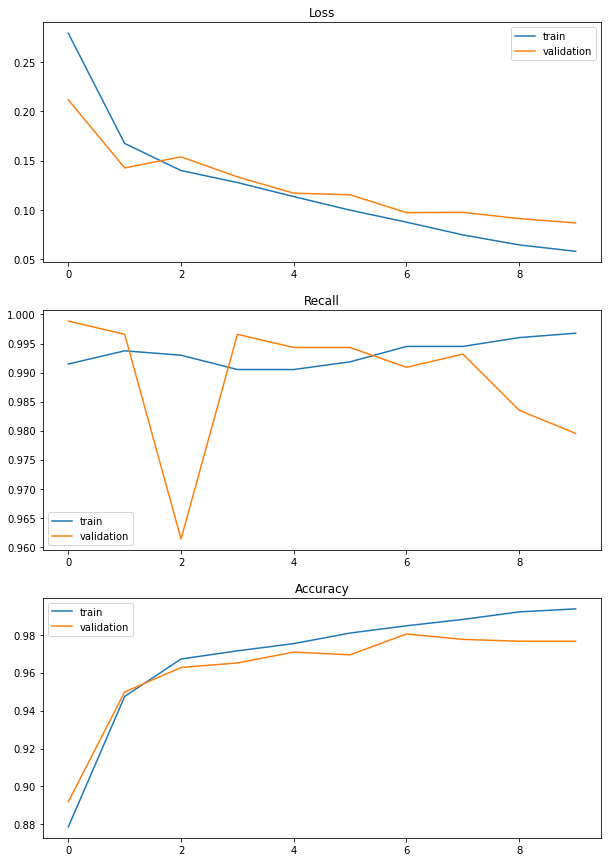

In [13]:
#add a bit of regularization with a dropout layer
model9 = models.Sequential()
model9.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model9.add(layers.MaxPooling2D(pool_size=(2, 2)))
model9.add(layers.Flatten())
model9.add(layers.Dropout(0.1))
model9.add(layers.Dense(64, activation='relu'))
model9.add(layers.Dense(1, activation='sigmoid'))

model9.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Recall', 'BinaryAccuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           verbose=1, patience=3,
                           mode='min')

results9 = model9.fit(train_generator, epochs=10, validation_data=validation_set,
                    callbacks=[early_stop])
plot_loss_recall_and_accuracy(results9)

In [15]:
#added some image augmentation to our best model--does not seem to help

train_data_dir = '../data/localdata/chest_xray/train'
test_data_dir = '../data/localdata/chest_xray/test'

generator2 = ImageDataGenerator(rescale=1/255, validation_split=0.25,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_generator2= generator2.flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', subset='training', class_mode='binary', seed=2)


train_images2, train_labels2 = next(train_generator2)


Found 6280 images belonging to 2 classes.


In [14]:
model10 = models.Sequential()
model10.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model10.add(layers.MaxPooling2D(pool_size=(2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dropout(0.1))
model10.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dense(1, activation='sigmoid'))

model10.compile(optimizer='Adam',
                loss='BinaryCrossentropy', 
                metrics=['Recall', 'BinaryAccuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           verbose=1, patience=3,
                           mode='min')

results10 = model10.fit(train_generator2, epochs=25, validation_data=validation_set, seed=2,
                    callbacks=[early_stop])
plot_loss_recall_and_accuracy(results10)


TypeError: fit() got an unexpected keyword argument 'seed'

In [16]:
#Compare our two best models

#print('''model3 precision: 0.9914 - binary_accuracy: 0.9862 - val_precision: 0.9822 - val_binary_accuracy: 0.9647''')
#print('''model9 precision: 0.9921 - binary_accuracy: 0.9905 - val_precision: 0.9956 - val_binary_accuracy: 0.9440''')

Both models are very strong, and quite similar. Model 3 is slightly more precise at the expense of accuracy and model 9 is the opposite. Precision is our most important metric, so model 9 is our optimal choice.

In [17]:
# best_model = models.Sequential()
# best_model.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(64, 64, 1)))
# best_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# best_model.add(layers.Flatten())
# best_model.add(layers.Dense(64, activation='relu'))
# best_model.add(layers.Dense(1, activation='sigmoid'))

# best_model.compile(optimizer='Adam',
#               loss='BinaryCrossentropy',
#               metrics=['Precision', 'BinaryAccuracy'])

# checkpoint_path = "best_model/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# results_best = best_model.fit(train_generator, epochs=10, validation_data=validation_set,
#                     callbacks=[cp_callback])
# plot_loss_and_accuracy(results_best)

In [18]:
#best_model.save('best_model.keras')

In [19]:
#best_model.load_weights("best_model/cp.ckpt")

In [20]:
#new_model = tf.keras.models.load_model('best_model.keras')

# Show the model architecture
#new_model.summary()

In [21]:
#new_model.evaluate(test_generator)

In [22]:
simple_model.save('simple_model.keras')
model2.save('model2.keras')
model3.save('model3.keras')
model4.save('model4.keras')
model5.save('model5.keras')
model6.save('model6.keras')
model7.save('model7.keras')
model8.save('model8.keras')
model9.save('model9.keras')
model10.save('model10.keras')

In [29]:
simple_model.evaluate(train_generator)
simple_model.evaluate(validation_set)

66/66 [==============================] - 22s 338ms/step - loss: 0.1086 - recall: 0.9778 - binary_accuracy: 0.9718


[0.10857035964727402, 0.9778156876564026, 0.9717973470687866]

In [30]:
model2.evaluate(train_generator)
model2.evaluate(validation_set)

66/66 [==============================] - 20s 306ms/step - loss: 0.0833 - recall: 0.9744 - binary_accuracy: 0.9742


[0.08329427987337112, 0.9744027256965637, 0.9741873741149902]

In [31]:
model3.evaluate(train_generator)
model3.evaluate(validation_set)

66/66 [==============================] - 19s 295ms/step - loss: 0.0770 - recall: 0.9875 - binary_accuracy: 0.9818


[0.07702190428972244, 0.9874857664108276, 0.9818355441093445]

In [32]:
model4.evaluate(train_generator)
model4.evaluate(validation_set)

66/66 [==============================] - 23s 344ms/step - loss: 0.0823 - recall: 0.9943 - binary_accuracy: 0.9799


[0.08228214830160141, 0.9943116903305054, 0.9799235463142395]

In [33]:
model5.evaluate(train_generator)
model5.evaluate(validation_set)

66/66 [==============================] - 23s 342ms/step - loss: 0.5263 - recall: 1.0000 - binary_accuracy: 0.8403


[0.5262901186943054, 1.0, 0.8403441905975342]

In [34]:
model6.evaluate(train_generator)
model6.evaluate(validation_set)

66/66 [==============================] - 22s 333ms/step - loss: 0.4409 - recall: 1.0000 - binary_accuracy: 0.8403


[0.4408545196056366, 1.0, 0.8403441905975342]

In [35]:
model7.evaluate(train_generator)
model7.evaluate(validation_set)

66/66 [==============================] - 22s 329ms/step - loss: 0.1407 - recall: 0.9949 - binary_accuracy: 0.9527


[0.14073149859905243, 0.9948805570602417, 0.9526768922805786]

In [36]:
model8.evaluate(train_generator)
model8.evaluate(validation_set)

66/66 [==============================] - 22s 333ms/step - loss: 0.1348 - recall: 0.9915 - binary_accuracy: 0.9742


[0.13483278453350067, 0.9914675951004028, 0.9741873741149902]

In [37]:
model9.evaluate(train_generator)
model9.evaluate(validation_set)

66/66 [==============================] - 22s 331ms/step - loss: 0.0868 - recall: 0.9795 - binary_accuracy: 0.9766


[0.08683475852012634, 0.979522168636322, 0.9765774607658386]

In [38]:
model10.evaluate(train_generator)
model10.evaluate(validation_set)

66/66 [==============================] - 21s 325ms/step - loss: 0.1350 - recall: 0.9596 - binary_accuracy: 0.9503


[0.1350133717060089, 0.9596132040023804, 0.9502868056297302]

In [40]:
model4.evaluate(test_generator)

36/36 [==============================] - 13s 366ms/step - loss: 1.2010 - recall: 0.9971 - binary_accuracy: 0.7825


[1.2009578943252563, 0.9970545172691345, 0.7824561595916748]

In [6]:
model11 = models.Sequential()
model11.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model11.add(layers.MaxPooling2D(pool_size=(2, 2)))
model11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model11.add(layers.Flatten())
model11.add(layers.Dense(64, activation='relu'))
model11.add(layers.Dense(1, activation='sigmoid'))

model11.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
                metrics=['Recall', 'BinaryAccuracy'])
results11 = model11.fit(train_generator2, epochs=10, validation_data=validation_set2)
plot_loss_recall_and_accuracy(results11)

Epoch 1/10
197/197 [==============================] - 107s 545ms/step - loss: 0.3982 - recall: 0.9833 - binary_accuracy: 0.8428 - val_loss: 0.2673 - val_recall: 0.9590 - val_binary_accuracy: 0.8886
Epoch 2/10
197/197 [==============================] - 104s 530ms/step - loss: 0.2794 - recall: 0.9583 - binary_accuracy: 0.8842 - val_loss: 0.2474 - val_recall: 0.9135 - val_binary_accuracy: 0.8948
Epoch 3/10
197/197 [==============================] - 105s 532ms/step - loss: 0.2426 - recall: 0.9564 - binary_accuracy: 0.8963 - val_loss: 0.1922 - val_recall: 0.9647 - val_binary_accuracy: 0.9140
Epoch 4/10
197/197 [==============================] - 102s 516ms/step - loss: 0.2159 - recall: 0.9577 - binary_accuracy: 0.9083 - val_loss: 0.1773 - val_recall: 0.9727 - val_binary_accuracy: 0.9254
Epoch 5/10
197/197 [==============================] - 99s 501ms/step - loss: 0.2113 - recall: 0.9615 - binary_accuracy: 0.9099 - val_loss: 0.1626 - val_recall: 0.9710 - val_binary_accuracy: 0.9364
Epoch 6/10


NameError: name 'plot_loss_recall_and_accuracy' is not defined

Epoch 1/10
197/197 [==============================] - 153s 775ms/step - loss: 0.3602 - recall: 0.9968 - binary_accuracy: 0.8578 - val_loss: 0.2003 - val_recall: 0.9926 - val_binary_accuracy: 0.9163
Epoch 2/10
197/197 [==============================] - 155s 789ms/step - loss: 0.1705 - recall: 0.9761 - binary_accuracy: 0.9315 - val_loss: 0.1103 - val_recall: 0.9869 - val_binary_accuracy: 0.9603
Epoch 3/10
197/197 [==============================] - 141s 715ms/step - loss: 0.1151 - recall: 0.9814 - binary_accuracy: 0.9553 - val_loss: 0.0905 - val_recall: 0.9903 - val_binary_accuracy: 0.9699
Epoch 4/10
197/197 [==============================] - 137s 693ms/step - loss: 0.0998 - recall: 0.9822 - binary_accuracy: 0.9623 - val_loss: 0.0774 - val_recall: 0.9841 - val_binary_accuracy: 0.9756
Epoch 5/10
197/197 [==============================] - 110s 557ms/step - loss: 0.0877 - recall: 0.9858 - binary_accuracy: 0.9691 - val_loss: 0.0736 - val_recall: 0.9829 - val_binary_accuracy: 0.9771
Epoch 6/10

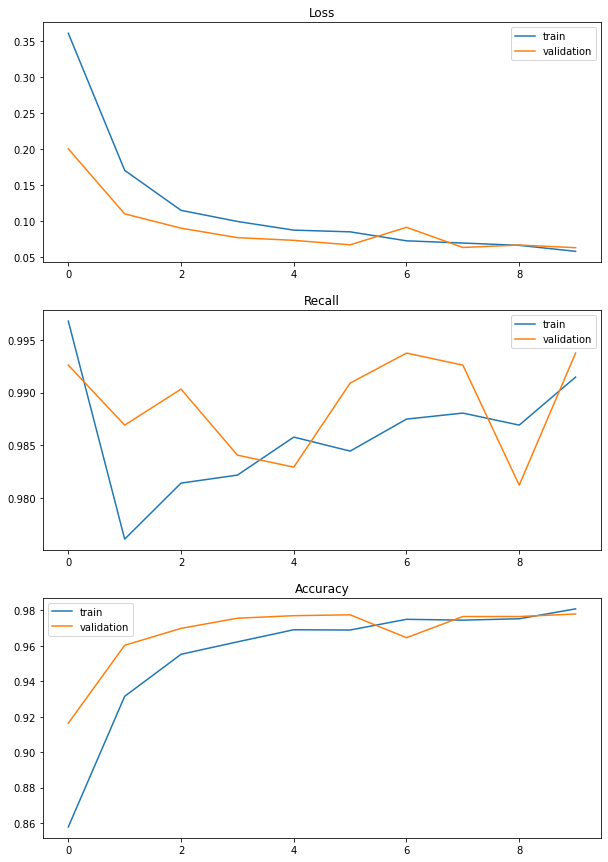

In [10]:
model12 = models.Sequential()
model12.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model12.add(layers.MaxPooling2D(pool_size=(2, 2)))
model12.add(layers.Conv2D(64, (3, 3), activation='relu'))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Conv2D(64, (3, 3), activation='relu'))
model12.add(layers.Flatten())
model12.add(layers.Dense(64, activation='relu'))
model12.add(layers.Dense(1, activation='sigmoid'))

model12.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
              loss='BinaryCrossentropy',
              metrics=['Recall', 'BinaryAccuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           verbose=1, patience=3,
                           mode='min')

results12 = model12.fit(train_generator, epochs=10, validation_data=validation_set,
                    callbacks=[early_stop])
plot_loss_recall_and_accuracy(results12)

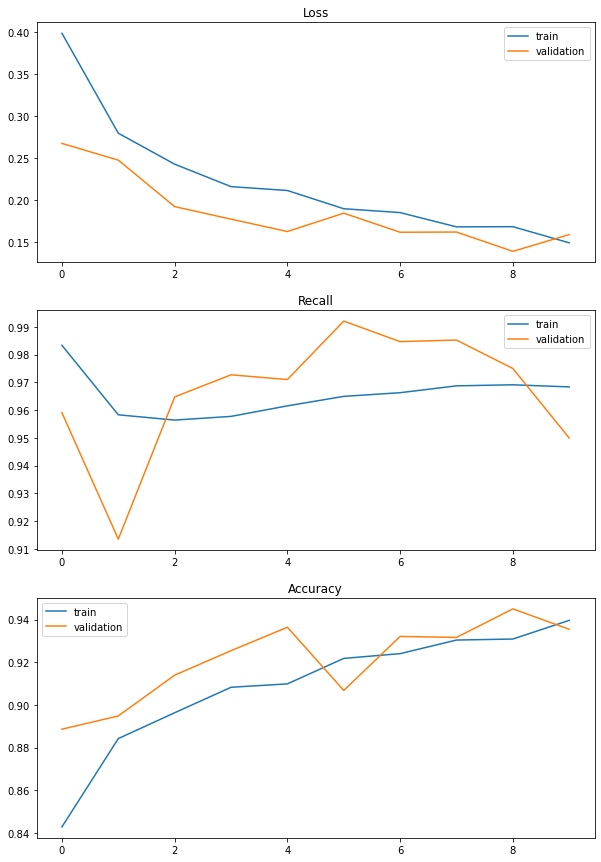

In [11]:
plot_loss_recall_and_accuracy(results11)

In [12]:
model11.save('model11.keras')
model12.save('model12.keras')

In [13]:
model11.evaluate(train_generator2)
model11.evaluate(validation_set2)

66/66 [==============================] - 24s 362ms/step - loss: 0.1689 - recall: 0.9499 - binary_accuracy: 0.9350


[0.16890586912631989, 0.9499431252479553, 0.9349904656410217]

In [14]:
model12.evaluate(train_generator)
model12.evaluate(validation_set)

66/66 [==============================] - 22s 330ms/step - loss: 0.0634 - recall: 0.9937 - binary_accuracy: 0.9780


[0.06342831254005432, 0.9937428832054138, 0.9780114889144897]